In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json, os, glob, re

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']
from expt import expt

/home/smaity/py36/lib64/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # This is added back by InteractiveShellApp.init_path()


## Demo

In [2]:
style_recovery, style_content_disentagle = expt(n = 10000, d = 10,
                                                d_style = 5, rho1 = 0.9, 
                                                rho2 = 0.9, lam = 1e4, seed = 0)

print(f'Discrepency in style recovery is {style_recovery:.4f} and style-content disentangelement is {style_content_disentagle:.4f}.\n')

Discrepency in style recovery is 0.0023 and style-content disentangelement is 0.0066.



## Simulation plot from saved summary

In [3]:
path = 'summary/'

list_dir = []

for file in glob.glob(path + '*.json'):
    with open(file) as f:
        data = json.load(f)
        list_dir.append(data)
        
df = pd.DataFrame(list_dir)

keys = ['rho1', 'rho2', 'lam']
measure = ['style_recovery', 'style_content_disentagle']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)

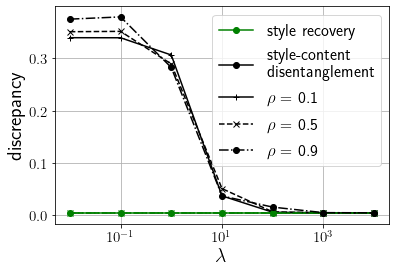

In [4]:
labelsize = 15
ticksize = 15
mks = ['+', 'x', 'o']
cols = ['g', 'k']
ltys = ['-', '--', '-.']
rhos = summary.rho2.unique()
summary1 = summary.loc[summary[('rho1', '')] == 0.9]


fig, ax2 = plt.subplots(1, 1)


for rho, lty, mk in zip(rhos, ltys, mks):
    for ms, col in zip(measure, cols):
        summary_part = summary1.loc[summary[('rho2', '')] == rho]
        x = summary_part[('lam', '')]
        y = summary_part[(ms, 'mean')]
        err = summary_part[(ms, 'std')]
        # ax1.errorbar(x[1:], y[1:], err[1:], color = col, marker = mk, linestyle = lty)
        plt.errorbar(x[1:], y[1:], err[1:], color = col, marker = mk, linestyle = lty)

for ax in [ax2, ]:
    ax.set_xscale('log', base = 10)
    # ax.set_yscale('log', base = 10)
    ax.set_xlabel(r'$\lambda$', fontsize = labelsize + 5,)
    ax.set_ylabel('discrepancy', fontsize = labelsize + 5)
    ax.tick_params(axis='both', which='major', labelsize=labelsize)
    
    

names = ['style recovery', 'style-content\ndisentanglement']

lines = []
labels = []

for name, col in zip(names, cols):
    labels.append(name)
    lines.append(Line2D([0], [0], color = col, marker = 'o', linestyle = '-'))
    
for rho, lty, mk in zip(rhos, ltys, mks):
    labels.append(r'$\rho=$ '+str(rho))
    lines.append(Line2D([0], [0], color = 'k', marker = mk, linestyle = lty))    

ax2.legend(lines, labels, loc='best',  fontsize = labelsize  + 2)
ax2.grid()
ax.minorticks_off()
plt.savefig('plots/sim-disentanglement.pdf', bbox_inches = 'tight')